# 🌍 Understanding Ground Range Resolution & SAR Geometrical Effects 📡✨  

In the last lesson, we learned how to **focus our SAR images** onto a coordinate system on the ground plane. But here’s the thing: **Radar measures time delays that can be convereted to radial distances**, not distances between targets along the ground plane. So, how do we **translate our range resolution to the ground?** 🤔  

---

## 📏 **From Radial (Slant Range) Resolution to Ground Range Resolution**  

When we achieve resolution due to the **chirp bandwidth**, it's in **radial distance** — also known as **slant range** in SAR terminology. But, the images we focus are projected onto the **ground plane**. So, how do we **connect our range resolution to the ground geometry?** 🤔  

### 🔑 **The Key Insight:**  
- 📡 Radar can measure the **distance** of targets based on the time delays of the echoes.  
- 🌍 Even when we use SAR techniques to **focus our data on the ground**, the **resolving power** remains in terms of **range (distance to target)** and **cross-range** (direction along the synthetic aperture).  
- 🔄 Our task? To **translate these measurements** into something more useful: the **geometry of the ground**.  

> 💡 **Terminology Note:**  
In SAR literature, the terms **azimuth** and **cross-range** are sometimes used interchangeably. This can be confusing, since **azimuth** typically refers to an **angle** in polar coordinates, while SAR images are usually represented on a **Cartesian (x, y) coordinate system**.  We use the term **cross-range** to describe the **dimension along the synthetic aperture** (perpendicular to ground range) in the SAR image. 🗺️📐


---

## 📡 **Why Side-Looking Geometry Matters**  

In **SAR imaging from aircraft or satellites**, we **always use a side-looking geometry**. But why? 🤔  

### 🌟 **The Reasoning:**  
- 🔽 If we pointed the antenna **directly down (nadir)**, almost all echoes would arrive with the **same time delay**. 📏❌  
- 📉 This means we **couldn't separate echoes based on range**, resulting in a complete loss of resolution along the ground range axis.  

✅ To **separate echoes in ground range** (remember from Lesson 5: ground range direction is the line of sight from radar projected to the ground plane), we need to look **a bit away from the nadir**. By doing this, echoes from different points along the **ground range axis** arrive with **different time delays**, allowing us to distinguish between them. ⏳✨  

---

## 🔄 **How Ground Range Resolution Works**  
Imagine we have a **range resolution of 50 cm**, which we achieved with our **300 MHz chirp**. But what does this mean on the ground?  

- Two targets on the ground are **resolvable** if the difference in their **range paths** is at least the **slant range resolution** ($ \Delta r $).  
- This separation in slant range can be converted to a separation on the ground using the **incidence angle ($ \theta $)**.  

### 🎨 **Let's Break This Down with a Drawing!**  

We’ll plot **two parallel microwave paths** coming from our radar antenna, which is positioned **very, very far away from the ground surface**. 📡✨  

### 🔍 **Here's what happens:**  
- These two rays **reflect from the points where they hit the ground**.  
- The **range difference** between the echoes from these two points is marked by the **magenta line**, $\Delta r$.  
- Let’s assume this distance is **exactly the same as our slant range resolution**. 🌸📏  

Now, here’s the big question:  

💡 **What is the distance between the points where the rays hit the ground, along the ground range axis \(y\)?**  
📏 This distance will give us our **ground range resolution**.  


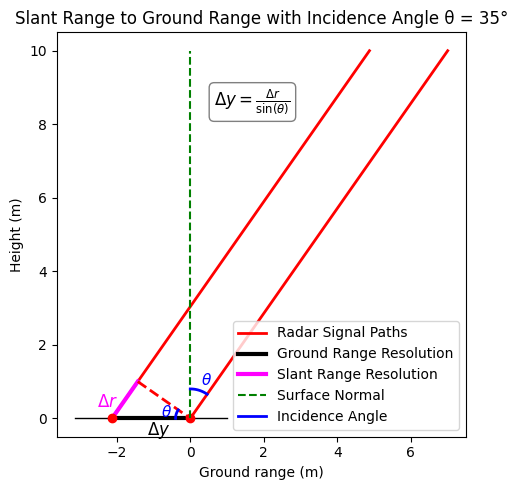

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Set the incidence angle
incidence_angle_degrees = 35

def plot_ground_range_resolution(theta_deg=30):
    """
    Visualize the connection between slant range resolution and ground range resolution.
    """

    # We set a constant slant range resolution of 1 m
    delta_r_slant = 1.0
    delta_r_ground = delta_r_slant / np.sin(np.radians(theta_deg))

    # Convert angle and compute slope
    theta = np.deg2rad(theta_deg)
    slope = 1 / np.tan(theta)  # cotangent of incidence angle

    # Compute offset between parallel rays (y = slope*x + c)
    c_offset = delta_r_ground * np.sqrt(1 + slope**2)

    # Ground intersections of rays
    x1_ground = 0
    x2_ground = -c_offset / slope

    # Top intersections (y = height)
    height = 10.0
    x1_top = height / slope
    x2_top = (height - c_offset) / slope

    # Ray coordinates
    ray1_start = (x1_ground, 0)
    ray1_end = (x1_top, height)
    ray2_start = (x2_ground, 0)
    ray2_end = (x2_top, height)

    # Calculate perpendicular intersection between rays
    origin = np.array(ray1_start)
    direction_perp = np.array([slope, -1])
    t_intersect = -c_offset / (slope**2 + 1)
    perp_point = origin + t_intersect * direction_perp
    x_perp, y_perp = perp_point
    x_horizontal = y_perp / slope  # horizontal projection of slant

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 5))

    # --- Ground line ---
    x_ground_min = min(x1_ground, x2_ground) - 1
    x_ground_max = max(x1_ground, x2_ground) + 1
    ax.plot([x_ground_min, x_ground_max], [0, 0], 'k-', linewidth=1)

    # --- Radar rays (red) ---
    ax.plot([ray1_start[0], ray1_end[0]], [ray1_start[1], ray1_end[1]], 'r-', linewidth=2, label="Radar Signal Paths")
    ax.plot([ray2_start[0], ray2_end[0]], [ray2_start[1], ray2_end[1]], 'r-', linewidth=2)

    # --- Ground range resolution (black segment) ---
    ax.plot([ray2_start[0], ray1_start[0]], [0, 0], 'k', linewidth=3, label='Ground Range Resolution')
    ax.text(-delta_r_ground/2, -0.45, r"$\Delta y$", color='k', fontsize=12, ha='center')

    # --- Slant range resolution (magenta segment) ---
    ax.plot([ray2_start[0], ray2_start[0] + x_horizontal], [0, y_perp], color='magenta', linewidth=3, label='Slant Range Resolution')
    ax.text(-delta_r_ground-0.5, 0.3, r"$\Delta r$", color='magenta', fontsize=12, ha='center')

    # --- Perpendicular line between rays (dashed red) ---
    ax.plot([ray2_start[0] + x_horizontal, 0], [y_perp, 0], 'r--', linewidth=2)

    # --- Ray ground intersections (red dots) ---
    ax.plot(ray1_start[0], ray1_start[1], 'ro')
    ax.plot(ray2_start[0], ray2_start[1], 'ro')

    # --- Surface normal (green dashed) ---
    normal_height = 10.0
    ax.plot([0, 0], [0, normal_height], 'g--', label="Surface Normal")

    # --- Incidence angle arc (upper left) ---
    arc_r = 0.8
    arc_angles = np.linspace(np.pi/2, np.pi/2 - theta, 30)
    arc_x = arc_r * np.cos(arc_angles)
    arc_y = arc_r * np.sin(arc_angles)
    ax.plot(arc_x, arc_y, 'b-', linewidth=2)

    # Label θ
    angle_mid = np.pi/2 - theta / 2
    label_x = 1.2 * arc_r * np.cos(angle_mid)
    label_y = 1.2 * arc_r * np.sin(angle_mid)
    ax.text(label_x, label_y, r"$\theta$", color='blue', fontsize=11)

    # --- Secondary angle arc (bottom left) ---
    arc_small = 0.4
    arc_small_angles = np.linspace(np.pi, np.pi - theta, 30)
    arc_sx = arc_small * np.cos(arc_small_angles)
    arc_sy = arc_small * np.sin(arc_small_angles)
    ax.plot(arc_sx, arc_sy, 'b-', linewidth=2, label='Incidence Angle')
    ax.text(-0.8, 0.05, r"$\theta$", color='blue', fontsize=11)

    # --- Display formula ---
    ax.text(
        0.65 * x_ground_max, 0.85 * normal_height,
        r"$\Delta y = \frac{\Delta r}{\sin(\theta)}$",
        fontsize=12,
        bbox=dict(boxstyle="round", fc="w", ec="gray")
    )

    # --- Final formatting ---
    ax.set_aspect('equal', 'box')
    x_min = min(x_ground_min, ray1_end[0], ray2_end[0]) - 0.5
    x_max = max(x_ground_max, ray1_end[0], ray2_end[0]) + 0.5
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([-0.5, normal_height + 0.5])

    ax.set_xlabel("Ground range (m)")
    ax.set_ylabel("Height (m)")
    ax.set_title(f"Slant Range to Ground Range with Incidence Angle θ = {theta_deg}°")

    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the plot
plot_ground_range_resolution(theta_deg=incidence_angle_degrees)

### 📐 **The Ground Range Resolution Formula**  

With a bit of trigonometry, we arrive at a simple formula:  

$$
\Delta y = \frac{\Delta r}{\sin(\theta)}
$$

### 💡 **What This Means:**  
- 🔽 As the **incidence angle**  $\theta$ decreases (we look closer to **nadir**), the **ground range resolution gets worse**.  
- 🔼 As the **incidence angle** increases (we look closer to the **horizon**), the **ground range resolution improves**.  
- 🚫 We also see that if the incidence angle is zero (**nadir-looking**), the ground range resolution is **infinitely bad**. 😱  

💪 **Try it out:** You can **adjust the incidence angle** in the code above to see how our **ground range resolution changes!** 📊🖥️  

📝 **Note:** In the code, we have set a **constant slant range resolution of 1 m**. By changing the incidence angle, you will see what this means for the **ground range resolution**. 🌍📏  

---

### 🌌 **The Spaceborne SAR Trade-Off**  

Now, you might be wondering: 🤔  
**If low incidence angles give us bad ground range resolution, why don't we always use a high incidence angle?**  

Well, there are a couple of reasons:  

1. **Geometry Constraints:**  
   - With spaceborne SAR, our **orbit determines the geometry** when we pass over a region of interest. 🌍🛰️  
   - To **maximize the number of imaging opportunities** over a certain region, we might need some **flexibility in geometry**.  

2. **The Big Physical Reason:**  
   - When we **increase the incidence angle**, we are looking **further away in range**! 🌌📏  
   - And here’s where **physics comes to bite us**:  
     - We're already **struggling for power** because we are so far away from the ground.  
     - Increasing the incidence angle **makes our life even harder** in terms of **Signal-to-Noise Ratio (SNR)** due to the **radar range equation**.  

### ⚖️ **Balancing Act:**  
In small spaceborne SAR systems, we face a **trade-off:**  

- **Low Incidence Angle:**  
  - 🔋 Higher received signal power (**better SNR**).  
  - 📉 Worse ground range resolution.  

- **High Incidence Angle:**  
  - 📸 Better ground range resolution.  
  - 📉 Weaker received signal power (**worse SNR**) due to the **increased range**.  

✅ Finding the **right balance** between **resolution and signal power** is a critical part of SAR imaging. 🧩✨  


---

### 🌄📡 Understanding Layover in SAR Imaging: Why Buildings and Mountains Lean Towards Us  

As we know very well, radar is a **ranging sensor** — it measures the distance to targets. 🛰️

Instead of directly mapping objects by their actual shape, **SAR measures slant range** — the **straight-line distance from the radar to objects**.  

In addition to **slant range**, we measure **cross-range**, which is the direction along the **flight path of the radar platform**.  

---

### 🌍📸 **What Does This Mean For Our Image?**  
Since SAR measures **distance and position along the flight path**, every reflection, **no matter where it came from in 3D space**, gets mapped onto a **2D surface**.  

What we end up with is a **2D representation of a 3D scene**, resulting in some fascinating **projection effects**!  

### 🔍📸 Optical Imaging vs. SAR Imaging: What's the Difference?

When we look at images produced by **optical cameras**, they are fundamentally different from **SAR images**. Let’s break down why:

---

### 📸 **How Optical Imaging Works:**  
- In **optical cameras**, the image plane is **perpendicular to the direction of incoming light rays**.  
- Light travels in straight lines, and the camera captures a **2D projection of the scene** from a single viewpoint.  
- This projection closely resembles how the human eye perceives the world. 🌍👁️  

---

### 📡 **How SAR Imaging Works:**  
- With **SAR**, we don’t have a typical camera lens. Instead, we use a **long, synthesized antenna** and measure the **distance to objects (range)**.  
- Instead of capturing light, SAR measures **microwave reflections**, and each pixel is determined by both **range (distance)** and **cross-range (along-track direction)**.  
- What’s different from optical images? The **other dimension of our data** is actually along the **direction of illumination**, not perpendicular to it!

![Optical vs. SAR projection](sar_projection.png)

---

### ❌ **What's Missing?**  

SAR **can't determine the height** of targets directly — we can only separate targets based on **where they are along the line of sight and the flight track direction**. 📡👀  

Because of this, certain features of the scene may appear **distorted or misrepresented**, especially when dealing with **steep terrain or tall structures**. 🏔️🏢  

💡 **Here's the problem:**  
Imagine we have a target that is not located on the **ground surface** we use to reconstruct the image, but instead, at some height $z$ above it.  

Since SAR imaging **uses the distance to map points in the image**, this elevated point will appear **shifted** along the **ground range axis**.  

📏 Specifically, its response will appear at the **ground range pixel $y$** that has the **same distance (slant range)** as the elevated point **from the radar’s perspective**.  

---

### 🏢 **Understanding Layover with a Simple Drawing**  

Let's illustrate this phenomenon, called **layover**, with a simple drawing. 📐✏️  

Imagine a **tall building** standing on the ground. Here's what happens:  

1. **Two microwave rays** are coming from our radar:  
   - One ray hits the **top of the building** and reflects back.  
   - The other ray hits a **point on the ground**, which is at the **exact same distance from the radar** as the top of the building.  

2. Since SAR imaging maps points based on their **distance from the radar**, both the **top of the building** and the **ground point** appear at the **same ground range pixel $y$** in the SAR image.

3. From a SAR processing perspective, the **range history (how the distance changes across the virtual elements) of an elevated target** matches the range history of a **different pixel located on the ground plane**. As a result, the elevated target is **misplaced** to that ground location in the final image. 🏔️➡️🏞️  

4. 📸 **Visual Effect:** This creates the illusion that the building is **leaning toward the radar** in the image!  

But there’s more! 🤓  
- We can actually **calculate the magnitude $\delta y$ of the layover**, i.e., how much **ground range the leaning building covers**, based on the **incidence angle**.  
- Or, if you have a SAR image where you can measure the **location of the base and the top of the building** along the ground range axis, you can determine the **height of the building**! 📏🧮
- In the drawing we imagine the target buliding is very very far away from the radar, so we can make a **plane wave** (parallel rays) approximation to derive a **simple formula**.

Layover is a fascinating effect in SAR imaging, but also a valuable tool for extracting **height information** from SAR images. 📊✨  

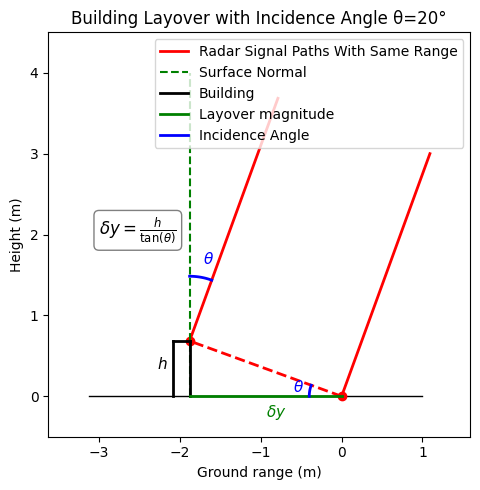

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Incidence angle
incidence_angle_degrees = 20 # degrees

def parallel_rays_schematic_left_arc(delta_r=1.0, theta_deg=30):
    """
    Visualize layover from a tall building for a SAR collection with incidence angle theta
    """

    theta_rad = np.deg2rad(theta_deg)
    slope = 1 / np.tan(theta_rad)  # cotangent of theta

    # Compute vertical offset c for two rays (perpendicular separation = delta_r)
    c_offset = delta_r * np.sqrt(1 + slope**2)

    # First ray: y = slope * x (goes through origin)
    # Second ray: y = slope * x + c_offset (parallel, offset)
    x2_ground = -c_offset / slope  # second ray intersects ground here

    # Define height (y-axis extent)
    height = 3.0
    x1_top = height / slope
    x2_top = (height - c_offset) / slope

    ray1_start = (0, 0)
    ray1_end = (x1_top, height)
    ray2_start = (x2_ground, 0)
    ray2_end = (x2_top, height)

    # Compute intersection point between perpendicular from ray1 to ray2
    origin = np.array(ray1_start)
    direction_perp = np.array([slope, -1.0])  # direction perpendicular to rays
    t_intersect = -c_offset / (slope**2 + 1)
    perp_intersection = origin + t_intersect * direction_perp
    x_perp, y_perp = perp_intersection
    x_horizontal = y_perp / slope

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 5))

    # Draw ground line
    x_ground_min = min(0, x2_ground) - 1
    x_ground_max = max(0, x2_ground) + 1
    ax.plot([x_ground_min, x_ground_max], [0, 0], 'k-', linewidth=1)

    # Plot red radar rays
    ax.plot([ray1_start[0], ray1_end[0]], [ray1_start[1], ray1_end[1]], 'r-', linewidth=2, label="Radar Signal Paths With Same Range")
    ax.plot([ray2_start[0] + x_horizontal, ray2_end[0] + x_horizontal], [ray2_start[1] + y_perp, ray2_end[1] + y_perp], 'r-', linewidth=2)

    # Ground intersections (red dots)
    ax.plot(ray1_start[0], ray1_start[1], 'ro')
    ax.plot(ray2_start[0] + x_horizontal, ray2_start[1] + y_perp, 'ro')

    # Perpendicular segment between rays (Δr)
    ax.plot([origin[0], x_perp], [origin[1], y_perp], 'r--', linewidth=2)

    # Vertical surface normal
    normal_height = 4.0
    ax.plot([ray2_start[0] + x_horizontal, ray2_start[0] + x_horizontal], [0, normal_height], 'g--', label="Surface Normal")

    # Draw vertical building
    building_width = 0.2
    ax.plot([ray2_start[0] + x_horizontal, ray2_start[0] + x_horizontal], [0, y_perp], 'k', linewidth=2, label="Building")
    ax.plot([ray2_start[0] + x_horizontal - building_width, ray2_start[0] + x_horizontal - building_width], [0, y_perp], 'k', linewidth=2)
    ax.plot([ray2_start[0] + x_horizontal - building_width, ray2_start[0] + x_horizontal], [y_perp, y_perp], 'k', linewidth=2)
    ax.text(ray2_start[0] + x_horizontal - building_width - 0.2, y_perp / 2, r"$h$", fontsize=11)

    # Draw layover distance Δy
    ax.plot([ray2_start[0] + x_horizontal, 0], [0, 0], 'g', linewidth=2, label='Layover magnitude')
    ax.text((ray2_start[0] + x_horizontal) / 2, -0.25, r"$\delta y$", color='green', fontsize=11)

    # Draw incidence angle arc (at top of building)
    arc_radius = 0.8
    arc_angles = np.linspace(np.pi/2, np.pi/2 - theta_rad, 30)
    arc_x = arc_radius * np.cos(arc_angles) + ray2_start[0] + x_horizontal
    arc_y = arc_radius * np.sin(arc_angles) + y_perp
    ax.plot(arc_x, arc_y, 'b-', linewidth=2)
    angle_mid = np.pi/2 - theta_rad / 2
    label_x = 1.2 * arc_radius * np.cos(angle_mid) + ray2_start[0] + x_horizontal
    label_y = 1.2 * arc_radius * np.sin(angle_mid) + y_perp
    ax.text(label_x, label_y, r"$\theta$", color='blue', fontsize=11)

    # Extra angle arc in lower-left corner
    arc_small = 0.4
    arc_angles_small = np.linspace(np.pi, np.pi - theta_rad, 30)
    arc_xs = arc_small * np.cos(arc_angles_small)
    arc_ys = arc_small * np.sin(arc_angles_small)
    ax.plot(arc_xs, arc_ys, 'b-', linewidth=2, label='Incidence Angle')
    ax.text(-0.6, 0.05, r"$\theta$", color='blue', fontsize=11)

    # --- Display formula ---
    ax.text(
        -3, 2,
        r"$\delta y = \frac{h}{\tan(\theta)}$",
        fontsize=12,
        bbox=dict(boxstyle="round", fc="w", ec="gray")
    )

    # Final plot formatting
    ax.set_aspect('equal', 'box')
    x_min = min(x_ground_min, ray1_end[0], ray2_end[0]) - 0.5
    x_max = max(x_ground_max, ray1_end[0], ray2_end[0]) + 0.5
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([-0.5, normal_height + 0.5])
    ax.set_xlabel("Ground range (m)")
    ax.set_ylabel("Height (m)")
    ax.set_title(f"Building Layover with Incidence Angle θ={theta_deg}°")
    ax.legend()
    plt.tight_layout()
    plt.show()

# Example usage:
parallel_rays_schematic_left_arc(delta_r=2.0, theta_deg=incidence_angle_degrees)

### 🛠️ **Engineer's Approach: Let's See Layover in Action!**  

Drawing things and doing theoretical calculations is fine for a physicist, but an **engineer needs to see this layover in action!** ⚙️💪  

So, let’s **simulate some SAR data** where we place targets at **different heights** and observe what happens!  

👇 **Here's what you can do:**  
- 📊 Use the simulation code below to **construct your own target building** and see how it **appears laid over in the formed image**.  
- 🔄 Adjust the **incidence angle** of the collection to see how the **magnitude of layover changes**.
- 📏 By adjusting the incidence angle, you can also see the **ground range resolution change**, because the simulation uses a **fixed slant range resolution**.


Approximate building layover magnitude (m): 5.773502691896259


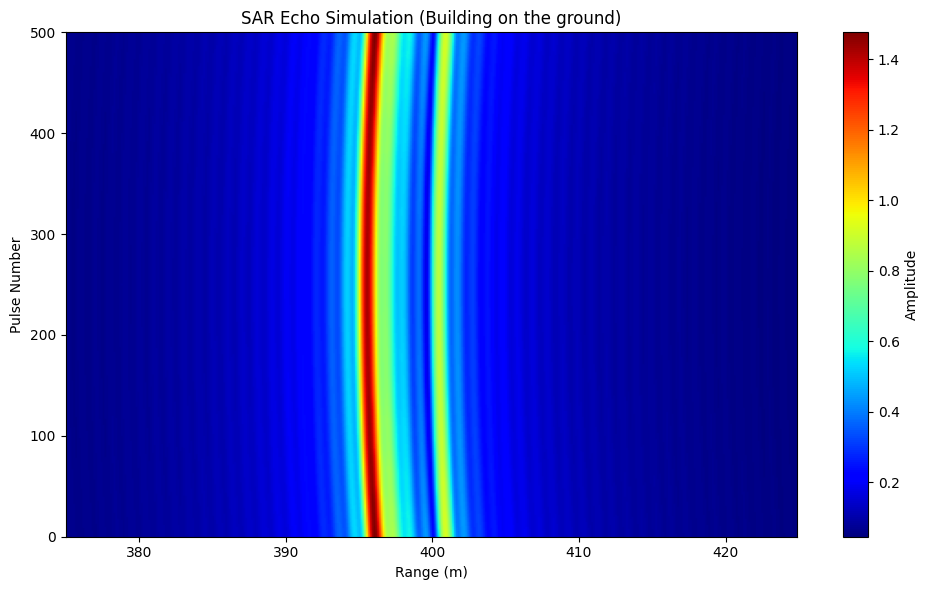

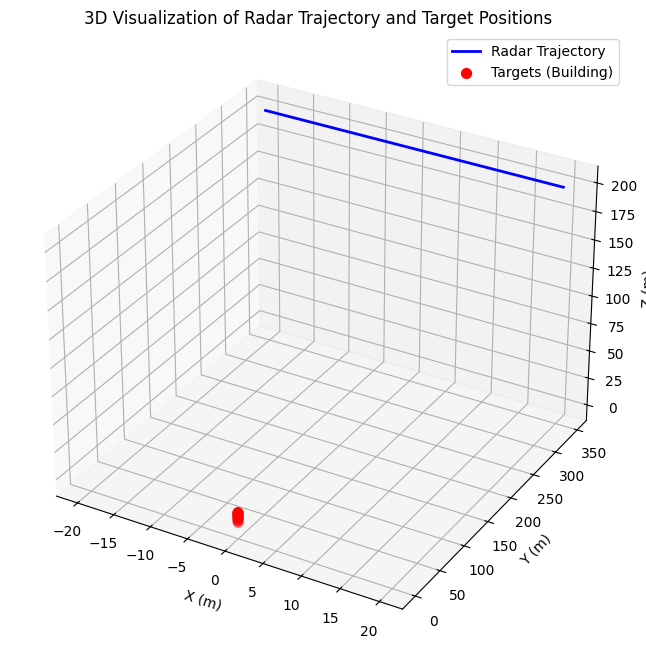

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Define incidence angle for the collection
incidence_angle_deg = 60 # (degrees)
building_heigth = 10 # (meters) Our image extent is only limited, so don't go too crazy ;)

def plot_3d_scenario(radar_positions, targets):
    """
    Plots the 3D scatter plot of radar positions and target positions.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot radar trajectory
    ax.plot(radar_positions[:, 0], radar_positions[:, 1], radar_positions[:, 2], 
            label='Radar Trajectory', color='blue', lw=2)

    # Plot target positions (building)
    ax.scatter(targets[:, 0], targets[:, 1], targets[:, 2], 
               color='red', s=50, label='Targets (Building)', marker='o')

    # Setting labels and title
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Z (m)')
    ax.set_title('3D Visualization of Radar Trajectory and Target Positions')
    ax.legend()
    plt.show()

def simulate_radar_data(
    target_positions,
    number_of_pulses=500,
    aperture_length=50,
    z_radar=200.0,
    incidence_angle_deg=40.0,
    range_resolution=1.0,
    wavelength=0.3,
    c=299792458
):
    """
    Simulates a range-compressed 2D radar data array (pulse vs. range samples)
    for given target positions (Nx3) at unit amplitude.

    Returns:
        range_compressed_data : (number_of_pulses, num_samples) complex64
            The simulated echo data for each pulse.
        range_axis : (num_samples,) float
            Range values (meters) for each sample.
        radar_positions : (number_of_pulses, 3) float
            The (x, y, z) position of the radar for each pulse.
    """
    # ---------------------------------------------
    # Radar & Signal Parameters
    # ---------------------------------------------
    B = c / (2 * range_resolution)       # Chirp bandwidth
    sampling_rate = 8 * B                # Oversampling factor
    pulse_duration = 10e-6               # seconds
    pulse_width_m = pulse_duration * c

    # Radar moves in x from x_start to x_end
    x_start = -aperture_length/2
    x_end = aperture_length/2
    x_radar_positions = np.linspace(x_start, x_end, number_of_pulses)

    # y_radar depends on incidence angle
    y_radar = z_radar * np.tan(np.radians(incidence_angle_deg))

    # Create the array of radar positions
    # shape = (number_of_pulses, 3)
    radar_positions = np.column_stack((
        x_radar_positions,
        np.full(number_of_pulses, y_radar),
        np.full(number_of_pulses, z_radar)
    ))

    # Simulate a range window
    radar_r1 = np.sqrt((x_radar_positions[0])**2 + y_radar**2 + z_radar**2)
    radar_r2 = np.sqrt((x_radar_positions[-1])**2 + y_radar**2 + z_radar**2)
    range_window = np.abs(radar_r2 - radar_r1) + 50
    r0 = np.sqrt(y_radar**2 + z_radar**2)
    total_time = 2.0 * range_window / c
    num_samples = int(sampling_rate * total_time)
    range_axis = np.linspace(r0-range_window/2, r0+range_window/2, num_samples, endpoint=False)

    # Sinc function for range-compressed data shape
    def sinc_pulse(time_array, center, width):
        y = np.sinc((time_array - center) / width)
        peak = np.max(np.abs(y))
        if peak > 0:
            y /= peak
        return y

    # Allocate 2D data array
    range_compressed_data = np.zeros((number_of_pulses, num_samples), dtype=np.complex64)

    # Simulate each pulse
    for i in range(number_of_pulses):
        echo_sum = np.zeros(num_samples, dtype=np.complex64)

        # Current radar x,y,z
        radar_xi = radar_positions[i, 0]
        radar_yi = radar_positions[i, 1]
        radar_zi = radar_positions[i, 2]

        for (tx, ty, tz) in target_positions:
            # Distance from radar to target
            r = np.sqrt((radar_xi - tx)**2 + (radar_yi - ty)**2 + (radar_zi - tz)**2)

            # Phase shift: 4*pi*r / wavelength (two-way path)
            phase = (4.0 * np.pi / wavelength) * r
            target_phasor = np.exp(1j * phase)

            # Summation of unit-amplitude echoes
            echo_waveform = sinc_pulse(range_axis, r, range_resolution)
            echo_sum += echo_waveform * target_phasor

        range_compressed_data[i, :] = echo_sum

    return range_compressed_data, range_axis, radar_positions


# Some simulation parameters
wavelength = 0.3 # m
range_resolution=1.0 # slant range resolution
z_radar=200.0 # Radar height above ground (m)
aperture_length = 40 # Length of synthetic aperture (m)
number_of_pulses = 500 # Number of simulated pulses

# Construct target array corresponding to the building
nb_targets = int(np.ceil(building_heigth/range_resolution))
targets = []
for i_target in range(nb_targets):
    targets.append([0.0, 0.0, i_target*1.0])

# Define target positions as Nx3 (x,y,z).
targets = np.array(targets)

max_layover = building_heigth / np.tan(np.radians(incidence_angle_deg))
print("Approximate building layover magnitude (m):", max_layover)

# Simulate data
range_compressed_data, range_axis, xyz_radar = simulate_radar_data(
    targets,
    number_of_pulses,
    aperture_length,
    z_radar,
    incidence_angle_deg,
    range_resolution,
    wavelength,
)

# Plots
fig, ax = plt.subplots(figsize=(10, 6))
mag_data = np.abs(range_compressed_data)
im = ax.imshow(
    mag_data,
    extent=[range_axis[0], range_axis[-1], 0, mag_data.shape[0]],
    aspect='auto',
    origin='lower',
    cmap='jet'
)
ax.set_xlabel("Range (m)")
ax.set_ylabel("Pulse Number")
ax.set_title("SAR Echo Simulation (Building on the ground)")
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Amplitude")
plt.tight_layout()
plt.show()

plot_3d_scenario(xyz_radar, targets)

In [12]:
def sar_beamforming(range_vector, range_compressed_data_array, xyz_radar, wavelength, 
                         image_x_extent, image_y_extent, nb_pixels_x, nb_pixels_y):
    """
    Form a 2D image by time-domain delay and sum beamforming (also called back-projection)
    """
    # Number of pulses and range bins in data
    number_of_pulses = range_compressed_data_array.shape[0]
    nb_range_samples = range_compressed_data_array.shape[1]

    # Range sampling
    range_spacing = range_vector[1] - range_vector[0]  # Assume uniform spacing

    # Create output image
    image = np.zeros((nb_pixels_y, nb_pixels_x), dtype=np.complex128)

    # Define x and y pixel coordinates
    x_grid = np.linspace(image_x_extent[0], image_x_extent[-1], nb_pixels_x)
    y_grid = np.linspace(image_y_extent[0], image_y_extent[-1], nb_pixels_y)

    # Loop over each pixel
    for iy, y_val in enumerate(y_grid):
        for ix, x_val in enumerate(x_grid):
            # Loop through the virtual antenna elements (pulses)
            for pulse in range(number_of_pulses):
                # Range from this radar position to the pixel
                pixel_range = np.sqrt((x_val - xyz_radar[pulse,0])**2 + 
                                      (y_val - xyz_radar[pulse,1])**2 + 
                                      (xyz_radar[pulse,2])**2)
                ## Find corresponding sample index (nearest neighbor)
                sample_index = int(round((pixel_range-range_vector[0])/range_spacing))
                if 0 <= sample_index < nb_range_samples:
                    # Calculate the phase we expected an echo from this pixel to have
                    pixel_phase = 2 * np.pi * (2*pixel_range) / wavelength
                    # Use a phasor with opposite phase to align the echoes from all virtual elements
                    pixel_phasor_correction = np.exp(-1j*pixel_phase)
                    # Sum the phase aligned echoes togehter
                    image[iy, ix] += range_compressed_data_array[pulse, sample_index] * pixel_phasor_correction

    image /= number_of_pulses # Normalize image amplitude

    return image, x_grid, y_grid

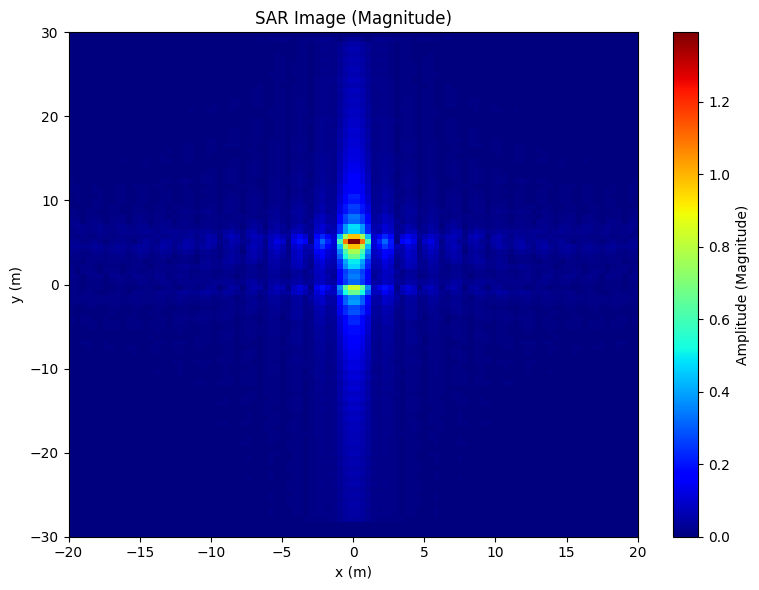

In [13]:
# Define image extent
x_extent = (-20, 20)
y_extent = (-30, 30)
# Define number of pixels. 
nb_pixels_x,nb_pixels_y = 100, 100

# Perform the back-projection
im, x_grid, y_grid = sar_beamforming(
    range_axis,
    range_compressed_data,
    xyz_radar,
    wavelength,
    x_extent,
    y_extent,
    nb_pixels_x,
    nb_pixels_y
)

# Plot the SAR image
plt.figure(figsize=(8, 6))

# Plot the SAR image
plt.imshow(
    np.abs(im),
    extent=[x_grid[0], x_grid[-1], y_grid[0], y_grid[-1]],
    origin='lower',
    aspect='auto',
    cmap='jet'
)

plt.colorbar(label="Amplitude (Magnitude)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("SAR Image (Magnitude)")
plt.tight_layout()
plt.show()

### 🔑 **Key Concepts:**  
✔️ **SAR can't measure the height of targets above the ground directly** — it measures **radial distance**.  
✔️ **Layover occurs** when the **top of an object is closer in slant range than its base**.  
✔️ **Steeper slopes facing the radar** → More layover.  
✔️ Layover causes the object to **appear “leaned over” toward the radar**.  